In [1]:
!ls


Experiments Result agents             main.py            summary
LICENSE            config.json        report             test.py
README.md          data               result
Run.ipynb          image              result_new


In [2]:
cd /Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/


/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-


In [3]:
ls

Experiments Result/ agents/             main.py             summary/
LICENSE             config.json         report/             test.py
README.md           data/               result/
Run.ipynb           image/              result_new/


In [57]:
%%writefile config.json
{
	"data":{
		"start_date":"2015-01-01",
		"end_date":"2018-01-01",
		"market_types":["stock"],
		"ktype":"D"
	},
	"session":{
		"start_date":"2007-01-01",
		"end_date":"2018-12-30",
		"market_types":"China",
	    "codes":5,
		"features":["close","high"],
		"agents":["CNN","PG","10"],
		"epochs":"50",
		"noise_flag":"True",
		"record_flag":"False",
		"plot_flag":"False",
		"reload_flag":"False",
		"trainable":"True",
		"method":"model_free"
	}
}

Overwriting config.json


In [62]:
%%writefile config.json
{
	"data":{
		"start_date":"2015-01-01",
		"end_date":"2018-01-01",
		"market_types":["stock"],
		"ktype":"D"
	},
	"session":{
		"start_date":"2012-01-01",
		"end_date":"2018-12-30",
		"market_types":"Vietnam",
	    "codes":["CTG","HPG","SSI","VCB","VNM"],
		"features":["close","high"],
		"agents":["CNN","PG","10"],
		"epochs":"200",
		"noise_flag":"True",
		"record_flag":"False",
		"plot_flag":"False",
		"reload_flag":"False",
		"trainable":"True",
		"method":"model_free"
	}
}

Overwriting config.json


In [ ]:
#["CTG","HPG","SSI","VCB","VNM"],

In [4]:
#%pycat agents/pg.py
%pycat config.json

{
        "data":{
                "start_date":"2015-01-01",
                "end_date":"2018-01-01",
                "market_types":["stock"],
                "ktype":"D"
        },
        "session":{
                "start_date":"2012-01-01",
                "end_date":"2018-12-30",
                "market_types":"Vietnam",
            "codes":["CTG","HPG","SSI","VCB","VNM"],
                "features":["close","high"],
                "agents":["CNN","PG","10"],
                "epochs":"200",
                "noise_flag":"True",
                "record_flag":"False",
                "plot_flag":"False",
                "reload_flag":"False",
                "trainable":"True",
                "method":"model_free"
        }
}


In [12]:
#pip install tensorflow==1.14
#pip uninstall tensorflow --yes
#pip show tensorflow

     |████████████████████████████████| 105.8MB 2.2MB/s eta 0:00:01    |█████████▋                      | 31.8MB 2.4MB/s eta 0:00:31     |███████████████████████▎        | 76.8MB 2.4MB/s eta 0:00:13
     |████████████████████████████████| 491kB 2.4MB/s eta 0:00:01
     |████████████████████████████████| 3.2MB 2.0MB/s eta 0:00:01
  Found existing installation: tensorflow-estimator 2.0.0
    Uninstalling tensorflow-estimator-2.0.0:
      Successfully uninstalled tensorflow-estimator-2.0.0
  Found existing installation: tensorboard 2.0.0
    Uninstalling tensorboard-2.0.0:
      Successfully uninstalled tensorboard-2.0.0
Note: you may need to restart the kernel to use updated packages.


In [59]:
#!python main.py
%run main.py --mode="train" --num=5

{'mode': 'train', 'num': 5}
*--------------------Training Status-------------------*
Date from 2007-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: China
Stock codes: 5
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 50
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False
successfully load config


/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:85: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  base_price = asset_data.ix[-1, 'close']
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:125: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documen

*-----------------Loading PG Agent---------------------*
Training with 50
Now we are at epoch 0
Reset buffer
*-----Episode: 0, Reward:248.693569%-----*
model write summary
Model save
Now we are at epoch 1
Reset buffer
*-----Episode: 1, Reward:253.720277%-----*
model write summary
Model save
Now we are at epoch 2
Reset buffer
*-----Episode: 2, Reward:250.640621%-----*
model write summary
Model save
Now we are at epoch 3
Reset buffer
*-----Episode: 3, Reward:230.669781%-----*
model write summary
Model save
Now we are at epoch 4
Reset buffer
*-----Episode: 4, Reward:267.451093%-----*
model write summary
Model save
Now we are at epoch 5
Reset buffer
*-----Episode: 5, Reward:252.526492%-----*
model write summary
Model save
Now we are at epoch 6
Reset buffer
*-----Episode: 6, Reward:274.106883%-----*
model write summary
Model save
Now we are at epoch 7
Reset buffer
*-----Episode: 7, Reward:243.438348%-----*
model write summary
Model save
Now we are at epoch 8
Reset buffer
*-----Episode: 8, R

{'mode': 'test', 'num': 5}
*--------------------Training Status-------------------*
Date from 2007-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: China
Stock codes: 5
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 50
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False


/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:85: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  base_price = asset_data.ix[-1, 'close']
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:125: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documen

Loading Model
result_new/PG/5/saved_network/True/
INFO:tensorflow:Restoring parameters from result_new/PG/5/saved_network/True/CNN-PG-10-50
Successfully loaded: result_new/PG/5/saved_network/True/CNN-PG-10-50
starting to backtest......
saving a file: result_new/PG/5/PG000985-600000-002066-000725-000151-88.44052771467624.csv
finish one agent
saving a file: result_new/PG/5/Winner000985-600000-002066-000725-000151-22.457567279853635.csv
finish one agent
saving a file: result_new/PG/5/UCRP000985-600000-002066-000725-000151-91.57401058221365.csv
finish one agent
saving a file: result_new/PG/5/Losser000985-600000-002066-000725-000151-7.93692953059828.csv
finish one agent
Asset Name     Average daily rate of return     Sharp rate     Maximum withdrawal
PG     0.147 %     0.558    0.419
Winner     -0.063 %     -0.232    0.78
UCRP     0.149 %     0.578    0.328
Losser     -0.226 %     -0.829    0.922


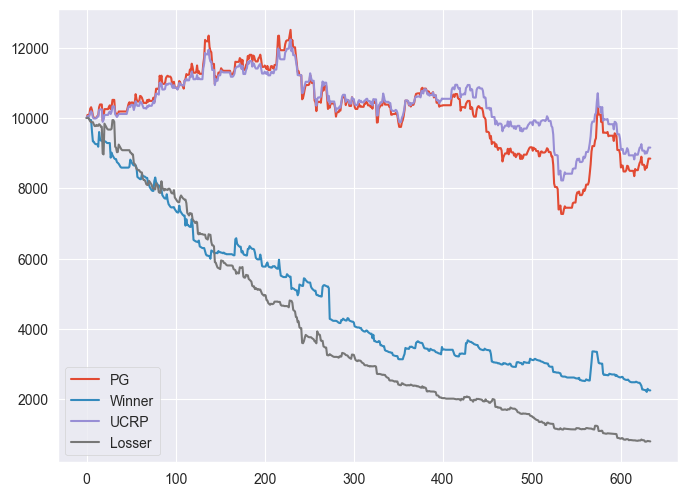

In [61]:
%run main.py --mode="test" --num=5

In [5]:
#!python main.py
%run main.py --mode="train" --num=6

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 







{'mode': 'train', 'num': 6}
*--------------------Training Status-------------------*
Date from 2012-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: Vietnam
Stock codes: ['CTG', 'HPG', 'SSI', 'VCB', 'VNM']
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 200
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False
Create new path at ./result_new/PG/6/


/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:85: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  base_price = asset_data.ix[-1, 'close']
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:125: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documen

Codes: ['CTG', 'SSI', 'VCB', 'VNM', 'HPG']
Training Time Period: 2012-01-03 00:00:00     2017-10-30 00:00:00
Testing Time Period: 2017-10-31 00:00:00     2018-12-28 00:00:00
finish writing config
*-----------------Loading PG Agent---------------------*

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.




Training with 200
Now we are at epoch 0
Reset buffer
*-----Episode: 0, Reward:177.071335%-----*
model write summary
Model save
Create new folder : ./result_new/PG/6/saved_network/True/
Now we are at epoch 1
Reset buffer
*-----Episode: 1, Reward:169.776052%-----*
model write summary
Model save
Now we are at epoch 2
Reset buffer
*-----Episode: 2, Reward:160.239024%-----*
model 

{'mode': 'test', 'num': 6}
*--------------------Training Status-------------------*
Date from 2012-01-01  to  2018-12-30
Features: ['close', 'high']
Agent:Noise( True )---Recoed( True )---Plot( False )
Market Type: Vietnam
Stock codes: ['CTG', 'HPG', 'SSI', 'VCB', 'VNM']
Predictor: CNN   Framework: PG   Window_length: 10
Epochs: 200
Trainable: True
Reloaded Model: False
Method model_free
Noise_flag True
Record_flag False
Plot_flag False


/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:85: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  base_price = asset_data.ix[-1, 'close']
/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Volumes/Data/python/Reinforcement-Learning-in-Finance/Reinforcement-learning-in-portfolio-management-/data/environment.py:125: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documen

Loading Model
./result_new/PG/6/saved_network/True/
INFO:tensorflow:Restoring parameters from ./result_new/PG/6/saved_network/True/CNN-PG-10-200
Successfully loaded: ./result_new/PG/6/saved_network/True/CNN-PG-10-200
starting to backtest......
saving a file: ./result_new/PG/6/PGCTG-SSI-VCB-VNM-HPG-120.17956282270012.csv
finish one agent
saving a file: ./result_new/PG/6/WinnerCTG-SSI-VCB-VNM-HPG-46.86250956525201.csv
finish one agent
saving a file: ./result_new/PG/6/UCRPCTG-SSI-VCB-VNM-HPG-95.29602277033987.csv
finish one agent
saving a file: ./result_new/PG/6/LosserCTG-SSI-VCB-VNM-HPG-38.2511034013718.csv
finish one agent
Asset Name     Average daily rate of return     Sharp rate     Maximum withdrawal
PG     0.317 %     0.93    0.498
Winner     0.069 %     0.212    0.584
UCRP     0.247 %     0.757    0.343
Losser     0.024 %     0.072    0.664


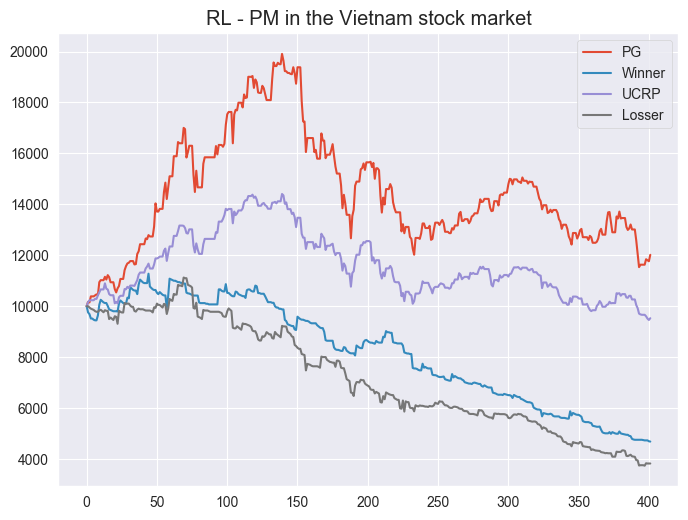

In [7]:
%run main.py --mode="test" --num=6

# Test

In [24]:
x = 1
y = 2
if x == 1 or y == 2: 
    print(1)

1


In [9]:
a = 1
print('sd',a)

sd 1


In [55]:
class car(): 
      
    # init method or constructor 
    def __init__(self, model, color): 
        self.model = model 
        self.color = color 
          
    def show(self): 
        print("Model is", self.model ) 
        print("color is", self.color ) 
          
# both objects have different self which  
# contain their attributes 
audi = car("audi a4", "blue") 
ferrari = car("ferrari 488", "green") 
  
audi.show()     # same output as car.show(audi) 
ferrari.show()  # same output as car.show(ferrari) 
  
# Behind the scene, in every instance method  
# call, python sends the instances also with 
# that method call like car.show(audi) 

Model is audi a4
color is blue
Model is ferrari 488
color is green


In [59]:
class s():
    def show(self):
        a = car("audi a4", "blue")
        a.show()

In [60]:
x = s()

In [61]:
x.show()

Model is audi a4
color is blue


In [44]:
path='result_new/PG/'+'2'+'/'+'saved_network/'+'True'+'/'
if not os.path.exists(path):
    print(os.path.exists(path))
    #os.makedirs(path)
    
    #print(path)
    

In [3]:
c = 0
if not c:
    print(2)

2
